# Assignment #10 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino</br>
Spring 2024</br>

Name: Udoy Chowdhury
</br>
Date: 2024-04-06
<br>
<br>
**At this time in the semester:** <br>
--We have explored a dataset. <br>
--We have cleaned our dataset. <br>
--We created a Github account with a repository for this class and included a Metadata file about our data. <br>
--We introduced general and more advanced SQL syntax, queries, and applications in R.<br>
--Created our own database from scratch in R using libraries RMariaDB and RSQLite <br>
--Populated our databases we created from scratch<br>
--Created a visual enhanced entity relationship diagram for our database.<br>
--Connect to a website using an API. Gather live data from a website using an API.<br>
<br>

**Objective**: Use the collected data to solve a real world problem.<br>
<br>
**iNaturalist**: iNaturalist is a community of citizen scientists that encourages accurate data collection and species identification of the natural world. 
<br>
No observations of captive plants or animals should be included in the iNaturalist data. Research grade observaitons have been verified by the community in terms of species ID, location, etc. Research grade observations have been verified by the community of experts in that field. 
<br>
API's are useful to bridge the gap between manually querying and downloading data, and then uploading them into R/Python, by just working with the live data directly in your platform of choice.

Follow the instructions below to complete the assignment. Answer any questions in markdown cell boxes. Be sure to comment all code.


Learn more about the iNaturalist API: https://api.inaturalist.org/v1/docs/#!/Observations/get_observations_observers<br><br>

R packages for working with iNaturalist API to gather live data:<br>
spocc: https://cran.r-project.org/web/packages/spocc/spocc.pdf <br>
rinat: https://cran.r-project.org/web/packages/rinat/rinat.pdf

## Part 2 - Accessing iNaturalist data through package API

When it comes to R and Python, there are many packages already created by users that save you the time while connecting to an API by connecting with packages instead. This way, you do not need to obtain your access token because you are using a package or an app that has already completed that process. We will continue with iNaturalst for this example. 

**R:** <br>
spocc (https://cran.r-project.org/web/packages/spocc/spocc.pdf) - A programmatic interface to many species occurrence data sources,including Global Biodiversity Information Facility ('GBIF'), 'iNaturalist',
'eBird', Ocean 'Biogeographic' Information System ('OBIS'), and many more! <br><br>
rinat (https://cran.r-project.org/web/packages/rinat/rinat.pdf) - A programmatic interface to the API provided by the 'iNaturalist' website to download species occurrence data submitted by citizen scientists. <br><br>
iNatTools - Outdated and may not work with current versions of R, but resources online using iNatTools may relate to the packages above.<br><br>
**Python:** <br>
pyiNaturalist (https://pypi.org/project/pyinaturalist/0.12.0/) <br>

In [2]:
import requests
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
import mysql.connector
from sqlalchemy import create_engine
import sqlite3
import pymysql
import geopandas as gpd
from shapely.geometry import Point

# Get rid of display restrictions
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

In [166]:
# Define the base URL
base_url = "https://api.inaturalist.org/v1/observations?"

# Set up parameters
params = {
    "q": "Harbour Porpoise",
    "year": 2024,
    "per_page": 5
}

# Make API request
response = requests.get(base_url, params=params)

# Put response into a dataframe
data = response.json()
# observations = pd.json_normalize(data)
observations = pd.json_normalize(data, record_path=['results'])
identifications = pd.json_normalize(data['results'], record_path='identifications')

# Get the unique scientific names
# unique_scientific_names = identifications['taxon.name'].unique()

# print(unique_scientific_names)
display(observations)

,quality_grade,time_observed_at,taxon_geoprivacy,annotations,uuid,id,cached_votes_total,identifications_most_agree,species_guess,identifications_most_disagree,tags,positional_accuracy,comments_count,site_id,created_time_zone,license_code,observed_time_zone,quality_metrics,public_positional_accuracy,reviewed_by,oauth_application_id,flags,created_at,description,time_zone_offset,project_ids_with_curator_id,observed_on,observed_on_string,updated_at,sounds,place_ids,captive,ident_taxon_ids,outlinks,faves_count,ofvs,num_identification_agreements,comments,map_scale,uri,project_ids,community_taxon_id,owners_identification_from_vision,identifications_count,obscured,num_identification_disagreements,geoprivacy,location,votes,spam,mappable,identifications_some_agree,project_ids_without_curator_id,place_guess,identifications,project_observations,observation_photos,photos,faves,non_owner_ids,observed_on_details.date,observed_on_details.day,observed_on_details.month,observed_on_details.year,observed_on_details.hour,observed_on_details.week,created_at_details.date,created_at_details.day,created_at_details.month,created_at_details.year,created_at_details.hour,created_at_details.week,taxon.is_active,taxon.ancestry,taxon.min_species_ancestry,taxon.endemic,taxon.iconic_taxon_id,taxon.min_species_taxon_id,taxon.threatened,taxon.rank_level,taxon.introduced,taxon.native,taxon.parent_id,taxon.name,taxon.rank,taxon.extinct,taxon.id,taxon.ancestor_ids,taxon.created_at,taxon.default_photo.id,taxon.default_photo.license_code,taxon.default_photo.attribution,taxon.default_photo.url,taxon.default_photo.original_dimensions.height,taxon.default_photo.original_dimensions.width,taxon.default_photo.flags,taxon.default_photo.square_url,taxon.default_photo.medium_url,taxon.taxon_changes_count,taxon.taxon_schemes_count,taxon.observations_count,taxon.photos_locked,taxon.universal_search_rank,taxon.flag_counts.resolved,taxon.flag_counts.unresolved,taxon.current_synonymous_taxon_ids,taxon.atlas_id,taxon.complete_species_count,taxon.wikipedia_url,taxon.iconic_taxon_name,taxon.preferred_common_name,preferences.prefers_community_taxon,geojson.type,geojson.coordinates,user.id,user.login,user.spam,user.suspended,user.created_at,user.site_id,user.login_autocomplete,user.login_exact,user.name,user.name_autocomplete,user.orcid,user.icon,user.observations_count,user.identifications_count,user.journal_posts_count,user.activity_count,user.species_count,user.universal_search_rank,user.roles,user.icon_url
0,research,2024-04-05T17:27:26+02:00,open,[],0808cbf2-2560-407f-b845-4672f1b58718,205760196,0,True,Harbour Porpoise,False,[],NaN,0,1,Europe/Copenhagen,None,Europe/Copenhagen,[],NaN,"[4390600, 7940105]",2.0,[],2024-04-07T00:42:35+02:00,None,+01:00,[],2024-04-05,2024-04-05 17:27:26,2024-04-07T00:45:39+02:00,[],"[8051, 13381, 29599, 51000, 51001, 59614, 6795...",False,"[48460, 1, 2, 355675, 40151, 848317, 848320, 8...",[],0,[],1,[],None,https://www.inaturalist.org/observations/20576...,[],41440.0,False,1,False,0,None,"57.584088,9.936949",[],False,True,True,[],"9850 Hirtshals, Danmark","[{'id': 467567234, 'uuid': '0d17b4db-0251-49eb...",[],"[{'id': 338818819, 'position': 0, 'uuid': 'bb4...","[{'id': 363855913, 'license_code': None, 'orig...",[],"[{'id': 467568233, 'uuid': '9fe8a68c-31cd-43e8...",2024-04-05,5,4,2024,17,14,2024-04-07,7,4,2024,0,14,True,48460/1/2/355675/40151/848317/848320/848324/15...,"48460,1,2,355675,40151,848317,848320,848324,15...",False,40151,41440,False,10,False,True,41438,Phocoena phocoena,species,False,41440,"[48460, 1, 2, 355675, 40151, 848317, 848320, 8...",2008-03-19T00:32:44+00:00,11936582,cc-by-sa,"(c) Ecomare/Salko de Wolf, some rights reserve...",https://inaturalist-open-data.s3.amazonaws.com...,1365,2048,[],https://inaturalist-open-data.s3.amazonaws.com...,https://inaturalist-open-data.s3.amazonaws.com...,1,5,7902,False,7902,2,1,None,None,None,http://en.wikipedia.org/wiki/Harbour_porpoise,Mammalia,Harbour Porpoise,None,Point,"[9.936949, 57.584088]",4390

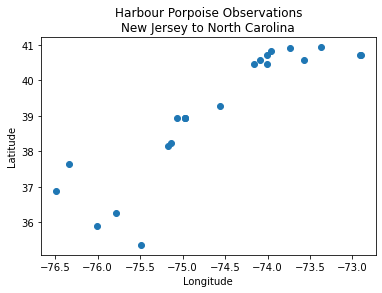

In [3]:
# The bounds
bounds = "33,-78,41,-69"

# Set parameters
params = {
    "q": "Harbour Porpoise",
    "nelat": 41,
    "nelng": -69,
    "swlat": 33,
    "swlng": -78,
    "per_page": 200
}

# Make API request
response = requests.get(base_url, params=params)
data = response.json()
observations = pd.json_normalize(data, record_path=['results'])

# Extract latitude/longitude
latitudes = [obs['geojson']['coordinates'][1] for obs in data['results']]
longitudes = [obs['geojson']['coordinates'][0] for obs in data['results']]

# Plot the observations
plt.scatter(longitudes, latitudes)
plt.title("Harbour Porpoise Observations\nNew Jersey to North Carolina")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [4]:
# Set Parameters
params = {
    "q": "Harbor Porpoise",
    "year": 2024,
    "per_page": 20
}

response = requests.get(base_url, params=params)
data = response.json()
observations = pd.json_normalize(data, record_path=['results'])
    

first_user_login = observations['user.login'].iloc[0]

more_params = {
    "user_id": first_user_login,
    "per_page": 5 
}
    
user_response = requests.get(base_url, params=more_params)
user_data = user_response.json()
user_observations = pd.json_normalize(user_data, record_path=['results'])
    
display(user_observations.head(5))

,quality_grade,time_observed_at,taxon_geoprivacy,annotations,uuid,id,cached_votes_total,identifications_most_agree,species_guess,identifications_most_disagree,tags,positional_accuracy,comments_count,site_id,created_time_zone,license_code,observed_time_zone,quality_metrics,public_positional_accuracy,reviewed_by,oauth_application_id,flags,created_at,description,time_zone_offset,project_ids_with_curator_id,observed_on,observed_on_string,updated_at,sounds,place_ids,captive,ident_taxon_ids,outlinks,faves_count,ofvs,num_identification_agreements,comments,map_scale,uri,project_ids,community_taxon_id,owners_identification_from_vision,identifications_count,obscured,num_identification_disagreements,geoprivacy,location,votes,spam,mappable,identifications_some_agree,project_ids_without_curator_id,place_guess,identifications,project_observations,observation_photos,photos,faves,non_owner_ids,observed_on_details.date,observed_on_details.day,observed_on_details.month,observed_on_details.year,observed_on_details.hour,observed_on_details.week,created_at_details.date,created_at_details.day,created_at_details.month,created_at_details.year,created_at_details.hour,created_at_details.week,taxon.is_active,taxon.ancestry,taxon.min_species_ancestry,taxon.endemic,taxon.iconic_taxon_id,taxon.min_species_taxon_id,taxon.threatened,taxon.rank_level,taxon.introduced,taxon.native,taxon.parent_id,taxon.name,taxon.rank,taxon.extinct,taxon.id,taxon.ancestor_ids,taxon.created_at,taxon.default_photo.id,taxon.default_photo.license_code,taxon.default_photo.attribution,taxon.default_photo.url,taxon.default_photo.original_dimensions.height,taxon.default_photo.original_dimensions.width,taxon.default_photo.flags,taxon.default_photo.square_url,taxon.default_photo.medium_url,taxon.taxon_changes_count,taxon.taxon_schemes_count,taxon.observations_count,taxon.photos_locked,taxon.universal_search_rank,taxon.flag_counts.resolved,taxon.flag_counts.unresolved,taxon.current_synonymous_taxon_ids,taxon.atlas_id,taxon.complete_species_count,taxon.wikipedia_url,taxon.complete_rank,taxon.iconic_taxon_name,taxon.preferred_common_name,taxon.conservation_status.id,taxon.conservation_status.place_id,taxon.conservation_status.source_id,taxon.conservation_status.user_id,taxon.conservation_status.authority,taxon.conservation_status.status,taxon.conservation_status.status_name,taxon.conservation_status.geoprivacy,taxon.conservation_status.iucn,preferences.prefers_community_taxon,geojson.type,geojson.coordinates,user.id,user.login,user.spam,user.suspended,user.created_at,user.site_id,user.login_autocomplete,user.login_exact,user.name,user.name_autocomplete,user.orcid,user.icon,user.observations_count,user.identifications_count,user.journal_posts_count,user.activity_count,user.species_count,user.universal_search_rank,user.roles,user.icon_url
0,research,2024-04-03T15:13:28+00:00,obscured,[],719ed0ea-59bc-489a-b9d5-5112fd432520,205689781,0,True,Atlantic Puffin,False,[],7623,0,1,Atlantic/Reykjavik,cc-by-nc,Atlantic/Reykjavik,[],24241,"[4279367, 5590834, 6907399]",2,[],2024-04-06T16:26:20+00:00,None,+00:00,[],2024-04-03,2024-04-03 15:13:28,2024-04-06T16:32:41+00:00,[],"[59614, 67952, 81490, 96372, 108692, 127570]",False,"[48460, 1, 2, 355675, 3, 67561, 71295, 4503, 4...",[],0,[],1,[],None,https://www.inaturalist.org/observations/20568...,[],4504.0,False,1,True,0,None,"64.3166955531,-22.0350508568",[],False,True,True,[],None,"[{'id': 467433398, 'uuid': 'ac7d78e1-db64-4c04...",[],"[{'id': 338697144, 'position': 0, 'uuid': '27b...","[{'id': 363723889, 'license_code': 'cc-by-nc',...",[],"[{'id': 467435611, 'uuid': 'a7177b2d-fb3d-4fec...",2024-04-03,3,4,2024,15,14,2024-04-06,6,4,2024,16,14,True,48460/1/2/355675/3/67561/71295/4503,"48460,1,2,355675,3,67561,71295,4503,4504",False,3,4504,True,10,False,True,4503,Fratercula arctica,species,False,4504,"[48460, 1, 2, 355675, 3, 67561, 71295, 4503, 4...",2008-03-13T02:45:33+00:00,63139388,cc-by-nc,"(c) Paul Steeves, some rights reserved (CC BY-...",https://inat

**STOP HERE**<br>
Using this package, we have a DOWNLOAD limit with their API, How can we possibly get around this? <br>
If you want to explore all of the data iNaturalist has to offer, unfortunetly RiNat is not going to cut it.
RiNat is a good resource for investigating small queries or very specific queries that yield small results.
<br><br>
Let's try a different API wrapper package instead and use it with a different approach:

## Case Study: **Northern Diamondback Terrapins** (_Malaclemys terrapin terrapin_)

Background information:<br>Diamondback terrapins are New Jersey's only species of brackish water turtle. Brackish water has a mixture of both salt water and fresh water. They are commonly found in the back bays and saltmarshes of New Jersey. They can be found from Massachusetts to North Carolina. The females come ashore to nest in the summer months, while the males will not leave the water at all. Coming ashore to nest has consequences and risks for this species that include human-caused mortalities from vehicle strikes and natural predation. Although the males do not leave the water, human-caused mortality due to crab pots and ghost gear remain a huge threat to both sexes for this species of special concern. Up until 2016, terrapins were hunted during their winter hibernation for terrapin soup! <br>
To further the concern for New Jersey's Diamondback terrapin, the species has temperature-dependent sex determination. Studies from research institutes and rehabilitation facilities, like Stockton University, have shown captive eggs that are incubated at a low temperature will produce all male terrapins and captive eggs that are incubated at a high temperature will produce all female terrapins. It is hypothesized that the determination of sexes may only vary by just a few degrees. If this is the case, how will the threat of climate change and the warming salt marshes impact our local population?<br><br>
**Note:** New Jersey's subspecies of terrapin is the NORTHERN Diamondback Terrapin (_Malaclemys terrapin terrapin_) or (_Genus species subspecies_). We want to make sure we are selecting for the taxon_id of the NORTHERN Diamondback Terrapin. <br><br>

### You are a data scientist for a wildlife contracting company, ML Wildlife. 

### ML Wildlife Mission Statement: To pioneer innovative approaches to wildlife management and policy-making through data collection, storage, and analysis. It is the company's goal to create sustainable connections between human activities and the natural world to preserve biodiversity.

#### In a New Jersey town (that will remain unnamed), there is a proposal to begin construction during the Summer of 2024 on a bike path that will run for 2.5 miles through the salt marsh. The bike path will be a raised (7ft) concrete pathway, or seawall, to accomodate for high and low tides to ensure that flooding is not an issue for the path. Water or wildlife (Turtles, fish, crabs, inverts, etc.) can not pass through or under the pathway. Birds can fly over the pathway. Construction is estimated to last four months. The goal of the pathway is to teach people about wildlife by walking through the man-made salt marsh trail. Railings will be placed on either side of the pathway to ensure human safety, but what about the safety of the wildlife?

#### Local environmentalists and biologists are concerned with the proposed bike path, especially for the state's Diamondback terrapin population. Will this bike path create an obstacle that will force more females to cross the roads to lay their eggs? What about the eggs that are laid along the bike bath already from the year before? Will the nests be ruined in the process? In addition to the Diamondback terrapin, additional species also utilize this area for nesting and feeding like the Ipswich Sparrow, which is a subspecies of the Savannah Sparrow that has a very limited range. The saltmarsh serves as an important nursery ground for Atlantic Menhaden, the Mid-Atlantic ecosystem's "Most Important Fish of the Sea."

Your job is to:<br>
--Collect citizen science observations from 2019-2024 in iNaturalist of the Northern Diamondback terrapin using the iNaturalist API with R package, spocc.<br>
--Upload that data into a database either locally or on your MySQL server. <br>
--Use SQL to: <br>
    ----Select for research grade observations only. We only want observations that have been accepted by expert naturalists or scientists that confirm the observation.<br>
    ----Determine the best time of year (Or months or weeks or time of day) for project construction.<br>
    ----Determine what subset of the population (Egg, Juvennile or Adult) you believe would be most impacted. <br>
    ----Determine the general observaiton population demographics, or range, for New Jersey terrrapins.<br>
    ----Explore two other species that inhabit and utilize the saltmarsh (Examples are the Ipswich sparrow, Seaside sparrow, Saltmarsh sparrow, Atlantic menhaden, or the Mud fiddler crab and Eastern Mud snail (What terrapins eat) and hypothesize how they would be impacted by this construction project after you have explored their data. Use the data from these other two species to support your decision below. If you would like to choose another species you can, just be mindful of iNaturalist API limits. I recommend looking at the iNaturalist website and explore the different species before collecting data that you do not need. <br>
    
--Provide your overall determination approving or disproving the project with three visualizations to go along with the queried SQL data. **Breifly state why and include three graphics** - but you do not have to go into too much biology detail and there is no right or wrong answer. <br>
--State two possible reasons for results for error in your visualizations.<br>
<br><br>
_Also note, this is a **mostly** "fictional" case study_ :). <br>

**Background information on the other species:**<br>
Ipswich Sparrow (_Passerculus sandwichensis princeps_) - A subspecies of the Savannah Sparrow. Subspecies can breed independently of the parent species. These birds feed directly in the dunes and saltmarshes. They are not as common as the parent species.<br>
Atlantic Menhaden (_Brevoortia tyrannus_) - A small schooling bait fish less than 10in in length. These fish begin their lives in the back bays and salt marshes. They are the primary food source for many species of marine mammals, birds, sharks, and larger fish. They are harvested commercially by us humans in the Mid-Atlantic to create fertilizer, fish oil, pet food, lip products and many other uses.<br>
Eastern Mud Snail (_Ilyanassa obsoleta_) - Food source to many species of birds and terrapins. The ocean clean up crew - feeds on detritis and other matter. <br>
Mud fiddler crab (_Minuca pugnax_) - Only found on the East Coast of the United States. Like many other animals, it is thought this species is expanding the Northern range due to climate change.

In [18]:
# Define the base URL
base_url = "https://api.inaturalist.org/v1/observations"

# Set up parameters
params = {
    "q": "Diamondback Terrapin",
    "year": 2024,
    "per_page": 200
}

# Make API request
response = requests.get(base_url, params=params)

# Put response into a dataframe
data = response.json()
# observations = pd.json_normalize(data)
observations = pd.json_normalize(data, record_path=['results'])

# Get the unique scientific names
unique_scientific_names = observations['taxon.name'].unique()

print(unique_scientific_names)
# display(observations)

['Malaclemys' 'Malaclemys terrapin' 'Malaclemys terrapin rhizophorarum'
 'Malaclemys terrapin littoralis' 'Malaclemys terrapin pileata'
 'Malaclemys terrapin terrapin' 'Malaclemys terrapin macrospilota'
 'Malaclemys terrapin centrata']


Our results show there are 8 different species/subspecies of terrapins documented worldwide in 2024. _Malaclemys terrapin terrapin_ are the species we want because they inhabit our area.

To obtain a taxon_id for any species or a place_id from iNaturalist:<br>
--Log in to the account you created <br>
--Hit Explore tab at the top <br>
--Search for ANY species you would like (In our case, it's Northern Diamondback Terrapin)<br>
--The taxon_id for the species is found in the URL: https://www.inaturalist.org/observations?place_id=any&subview=map&**taxon_id=39838**
<br>
--More information on the different attributes you can use to filter the data: https://www.inaturalist.org/pages/annotations

In [480]:
#library(spocc) - We already called this library earlier.
#Taxa variables for functions:

taxon_id <- 39838  #Northern Diamondback Terrapin (NDBT) species ID obtained from the URL.

taxon <-- 237674 Ipswhich Sparrow
#41440 - is the id for Phocoena phocoena
#623433 is the id for ATLANTIC Harbor Porpoise specifically.

Write a function that selects for ANY specific variables to help you answer the questions above. <br>
A great resource is found here for writing a looping function that does not stress out the API: https://eleanor-jackson.com/post/2021-04-06-searching-for-spring/ <br>
<br>
The API call: <br>
"https://api.inaturalist.org/v1/observations?....<br><br>
taxon_id=", taxon_id, "& #I have supplied the taxon ID above for NDBT, but feel free to adjust or explore others to help answer your objectives.<br><br>
place_id=any& #Observation IDs are for ANYWHERE in the world. I specifically chose NDBT because I know they only exist from Massachusetts to North Carolina. So I know I will not be getting millions of rows of data because it is a species with a limited geography.<br>
<br>
d1=2020-01-01& #The date you are collecting observations from. 2020-Present. Earlier dates will take longer processing times. <br>
<br>
per_page=200& #The number of results per query. **NOTE** The iNaturalist API ONLY allows for 200 records at a time. This is why we have a function below to loop every 200 observations.<br>
<br>
order_by=id& #Order by species id<br>
<br>
order=asc& #Ascending order<br>
<br>
id_above=0"<br><br>

**A detailed explanation on these parameters can be found here: https://www.inaturalist.org/pages/search+urls**

Listing multiple taxon ID's:
https://www.inaturalist.org/observations?place_id=any&taxon_ids=85553,26039,47113

Multiple taxa using a List (Define your list beforehand).

You can use lists on iNaturalist to restrict a search to a set of taxa. For example, https://www.inaturalist.org/lists/111820-Chicago-Wilderness-Region-Spring-Wildflowers is a list that is already set up.

Sort by Dates or Randomly

The Identify Filters panel already has options built in to sort by Date Added (default), Date Observed, Date Updated (edited), Faves, or Random. Sorting options are Descending (default) or Ascending.

Two of these options are not available in the Explore filters, but can still be added manually: Date Updated and Random. To add these, use

    order_by=updated_at
    order_by=random

Sorting order is specified by

    order=desc or
    order=asc

Annotations

term_id= - the annotation group

    1=Life Stage, 9=Sex, 12=Plant Phenology, 17=Alive or Dead

term_value_id= - the value within the group

    Life Stage: 2=Adult, 3=Teneral, 4=Pupa, 5=Nymph, 6=Larva, 7=Egg, 8=Juvenile, 16=Subimago
    Sex: 10=Female, 11=Male
    Plant Phenology: 13=Flowering, 14=Fruiting, 15=Flower Budding, 21=No Evidence of Flowering
    Alive or Dead: 18=Alive, 19=Dead, 20=Cannot Be Determined


In [155]:
# Fetch data for Northern Diamondback Terrapin
observations = []

for year in range(2019, 2025):
    params = {
        "taxon_id": 39838,
        "year": year,
        "per_page": 200,
        "quality_grade": "research",
        "term_value_id": 7
    }

    response = requests.get(base_url, params=params)
    data = response.json()
    observations += data['results']

# Convert to DataFrame
df = pd.json_normalize(observations)

Adult NDBT Data

In [ ]:
base_url = "https://api.inaturalist.org/v1/observations"
observations = []

for year in range(2019, 2025):
    page = 1
    print(f"Fetching data for year: {year}")
    while True:
        print(f"\tFetching page: {page}")
        params = {
            "taxon_id": 39838,
            "year": year,
            "per_page": 200,
            "quality_grade": "research",
            "term_id": 1,
            "term_value_id": 2,
            "page": page
        }
        
        response = requests.get(base_url, params=params)
        data = response.json()
        
        # Check if the current page has observations
        if data['results']:
            observations += data['results']
            print(f"\t\t{len(data['results'])} observations fetched.")
            page += 1 
        else:
            print(f"\tNo more data in {year}. Moving to next year.")
            break 

# Create a DF
adult_df = pd.json_normalize(observations)

Egg NDBT Data

In [ ]:
base_url = "https://api.inaturalist.org/v1/observations"
observations = []

for year in range(2019, 2025):
    page = 1
    print(f"Fetching data for year: {year}")
    while True: 
        print(f"\tFetching page: {page}")
        params = {
            "taxon_id": 39838,
            "year": year,
            "per_page": 200, 
            "quality_grade": "research",
            "term_id": 1,
            "term_value_id": 7,
            "page": page
        }
        
        response = requests.get(base_url, params=params)
        data = response.json()
        
        # Check if the current page has observations
        if data['results']:
            observations += data['results']
            print(f"\t\t{len(data['results'])} observations fetched.")
            page += 1 
        else:
            print(f"\tNo more data in year {year}. Moving to next year.")
            break 

# Create a DF
egg_df = pd.json_normalize(observations)

Juvenile NDBT Data

In [ ]:
base_url = "https://api.inaturalist.org/v1/observations"
observations = []

for year in range(2019, 2025):
    page = 1
    print(f"Fetching data for year: {year}")
    while True: 
        print(f"\tFetching page: {page}")
        params = {
            "taxon_id": 39838, 
            "year": year,
            "per_page": 200,
            "quality_grade": "research",
            "term_id": 1,
            "term_value_id": 8,
            "page": page
        }
        
        response = requests.get(base_url, params=params)
        data = response.json()
        
        # Check if the current page has observations
        if data['results']:
            observations += data['results']
            print(f"\t\t{len(data['results'])} observations fetched.")
            page += 1 
        else:
            print(f"\tNo more data in year {year}. Moving to next year.")
            break  

# Create a DF
juvenile_df = pd.json_normalize(observations)

Female NDBT Data

In [ ]:
base_url = "https://api.inaturalist.org/v1/observations"
observations = []

for year in range(2019, 2025):
    page = 1
    print(f"Fetching data for year: {year}")
    while True:
        print(f"\tFetching page: {page}")
        params = {
            "taxon_id": 39838, 
            "year": year,
            "per_page": 200,
            "quality_grade": "research",
            "term_id": 9,
            "term_value_id": 10,
            "page": page
        }
        
        response = requests.get(base_url, params=params)
        data = response.json()
        
        # Check if the current page has observations
        if data['results']:
            observations += data['results']
            print(f"\t\t{len(data['results'])} observations fetched.")
            page += 1 
        else:
            print(f"\tNo more data in year {year}. Moving to next year.")
            break  

# Create a DF
female_df = pd.json_normalize(observations)

Male NDBT Data

In [ ]:
base_url = "https://api.inaturalist.org/v1/observations"
observations = []

for year in range(2019, 2025):
    page = 1
    print(f"Fetching data for year: {year}")
    while True: 
        print(f"\tFetching page: {page}")
        params = {
            "taxon_id": 39838,
            "year": year,
            "per_page": 200, 
            "quality_grade": "research",
            "term_id": 9,
            "term_value_id": 11,
            "page": page
        }
        
        response = requests.get(base_url, params=params)
        data = response.json()
        
        # Check if the current page has observations
        if data['results']:
            observations += data['results']
            print(f"\t\t{len(data['results'])} observations fetched.")
            page += 1  
        else:
            print(f"\tNo more data in year {year}. Moving to next year.")
            break 

# Create a DF
male_df = pd.json_normalize(observations)

Ipswich Sparrow Data

In [ ]:
base_url = "https://api.inaturalist.org/v1/observations"
observations = []

for year in range(2019, 2025):
    page = 1
    print(f"Fetching data for year: {year}")
    while True: 
        print(f"\tFetching page: {page}")
        params = {
            "taxon_id": 237674,
            "year": year,
            "per_page": 200, 
            "quality_grade": "research",
            "page": page
        }
        
        response = requests.get(base_url, params=params)
        data = response.json()
        
        # Check if the current page has observations
        if data['results']:
            observations += data['results']
            print(f"\t\t{len(data['results'])} observations fetched.")
            page += 1  
        else:
            print(f"\tNo more data in year {year}. Moving to next year.")
            break 

# Create a DF
sparrow_df = pd.json_normalize(observations)

Eastern Mud Snail Data

In [ ]:
base_url = "https://api.inaturalist.org/v1/observations"
observations = []

for year in range(2019, 2025):
    page = 1
    print(f"Fetching data for year: {year}")
    while True: 
        print(f"\tFetching page: {page}")
        params = {
            "taxon_id": 70005,
            "year": year,
            "per_page": 200, 
            "quality_grade": "research",
            "page": page
        }
        
        response = requests.get(base_url, params=params)
        data = response.json()
        
        # Check if the current page has observations
        if data['results']:
            observations += data['results']
            print(f"\t\t{len(data['results'])} observations fetched.")
            page += 1  
        else:
            print(f"\tNo more data in year {year}. Moving to next year.")
            break 

# Create a DF
snail_df = pd.json_normalize(observations)

In [191]:
# Replace period with columns and make everything lowercase
egg_df.columns = [col.replace('.', '_').lower() for col in egg_df.columns]
juvenile_df.columns = [col.replace('.', '_').lower() for col in juvenile_df.columns]
adult_df.columns = [col.replace('.', '_').lower() for col in adult_df.columns]
male_df.columns = [col.replace('.', '_').lower() for col in male_df.columns]
female_df.columns = [col.replace('.', '_').lower() for col in female_df.columns]
sparrow_df.columns = [col.replace('.', '_').lower() for col in sparrow_df.columns]
snail_df.columns = [col.replace('.', '_').lower() for col in snail_df.columns]

Create a database for your data:

In [3]:
# Define our variables. We set these during our first class in our technology set up. 
password = 'chowdhury626'
username = 'root'
port = 3306
database_name = 'nbdt_data'
host = 'localhost'

# Connect to the server
con = pymysql.connect(host=host, user=username, password=password)

# Create cursor
cursor = con.cursor()

# Create database
# cursor.execute(f"CREATE DATABASE IF NOT EXISTS {database_name}")

# Connect to the database
con = pymysql.connect(host=host, user=username, password=password, database=database_name)

# Specify the database
cursor.execute(f"USE {database_name}")

0

**STOP**<br>
Whether you created your database locally or on a server, double check the file has been created.

***Create Tables***

In [193]:
create_table_statement_query = """
CREATE TABLE {}_info (
    id INT PRIMARY KEY,
    quality_grade VARCHAR(255),
    time_observed_at DATETIME,
    taxon_geoprivacy VARCHAR(255),
    annotations TEXT,
    uuid VARCHAR(255),
    cached_votes_total INT,
    identifications_most_agree BOOLEAN,
    species_guess VARCHAR(255),
    identifications_most_disagree BOOLEAN,
    tags TEXT,
    positional_accuracy FLOAT,
    comments_count INT,
    site_id INT,
    created_time_zone VARCHAR(255),
    license_code VARCHAR(255),
    observed_time_zone VARCHAR(255),
    quality_metrics TEXT,
    public_positional_accuracy FLOAT,
    reviewed_by TEXT,
    oauth_application_id INT,
    flags TEXT,
    created_at DATETIME,
    description TEXT,
    time_zone_offset VARCHAR(255),
    project_ids_with_curator_id TEXT,
    observed_on DATE,
    observed_on_string VARCHAR(255),
    updated_at DATETIME,
    sounds TEXT,
    place_ids TEXT,
    captive BOOLEAN,
    ident_taxon_ids TEXT,
    outlinks TEXT,
    faves_count INT,
    ofvs TEXT,
    num_identification_agreements INT,
    comments TEXT,
    map_scale INT,
    uri VARCHAR(255),
    project_ids TEXT,
    community_taxon_id INT,
    owners_identification_from_vision BOOLEAN,
    identifications_count INT,
    obscured BOOLEAN,
    num_identification_disagreements INT,
    geoprivacy VARCHAR(255),
    location VARCHAR(255),
    votes INT,
    spam BOOLEAN,
    mappable BOOLEAN,
    identifications_some_agree BOOLEAN,
    project_ids_without_curator_id TEXT,
    place_guess VARCHAR(255),
    geojson_type VARCHAR(255),
    geojson_coordinates TEXT,
    -- The following columns were added based on the detailed list provided
    observation_photos TEXT, -- Assuming JSON or array
    photos TEXT, -- Assuming JSON or array
    faves TEXT, -- Assuming JSON or array
    non_owner_ids TEXT, -- Assuming JSON or array
    observed_on_details_date DATE,
    observed_on_details_day INT,
    observed_on_details_month INT,
    observed_on_details_year INT,
    observed_on_details_hour INT,
    observed_on_details_week INT,
    created_at_details_date DATE,
    created_at_details_day INT,
    created_at_details_month INT,
    created_at_details_year INT,
    created_at_details_hour INT,
    created_at_details_week INT,
    taxon_is_active BOOLEAN,
    taxon_ancestry TEXT,
    taxon_min_species_ancestry TEXT,
    taxon_endemic BOOLEAN,
    taxon_iconic_taxon_id INT,
    taxon_min_species_taxon_id INT,
    taxon_threatened BOOLEAN,
    taxon_rank_level FLOAT,
    taxon_introduced BOOLEAN,
    taxon_native BOOLEAN,
    taxon_parent_id INT,
    taxon_name VARCHAR(255),
    taxon_rank VARCHAR(255),
    taxon_extinct BOOLEAN,
    taxon_id INT,
    taxon_ancestor_ids TEXT,
    taxon_created_at DATETIME,
    taxon_default_photo_id INT,
    taxon_default_photo_license_code VARCHAR(255),
    taxon_default_photo_attribution TEXT,
    taxon_default_photo_url TEXT,
    taxon_default_photo_original_dimensions_height INT,
    taxon_default_photo_original_dimensions_width INT,
    taxon_default_photo_flags TEXT,
    taxon_default_photo_square_url TEXT,
    taxon_default_photo_medium_url TEXT,
    taxon_taxon_changes_count INT,
    taxon_taxon_schemes_count INT,
    taxon_observations_count INT,
    taxon_photos_locked BOOLEAN,
    taxon_universal_search_rank INT,
    taxon_flag_counts_resolved INT,
    taxon_flag_counts_unresolved INT,
    taxon_current_synonymous_taxon_ids TEXT,
    taxon_atlas_id INT,
    taxon_complete_species_count INT,
    taxon_wikipedia_url TEXT,
    taxon_iconic_taxon_name VARCHAR(255),
    taxon_preferred_common_name VARCHAR(255),
    preferences_prefers_community_taxon BOOLEAN,
    user_login VARCHAR(255),
    user_spam BOOLEAN,
    user_suspended BOOLEAN,
    user_created_at DATETIME,
    user_site_id INT,
    user_login_autocomplete TEXT,
    user_login_exact VARCHAR(255),
    user_name VARCHAR(255),
    user_name_autocomplete TEXT,
    user_orcid TEXT,
    user_icon TEXT,
    user_observations_count INT,
    user_identifications_count INT,
    user_journal_posts_count INT,
    user_activity_count INT,
    user_species_count INT,
    user_universal_search_rank INT,
    user_roles TEXT,
    user_icon_url TEXT,
    user_preferences_prefers_project_addition_by BOOLEAN,
    geojson TEXT,
    user_preferences_prefers_community_taxa BOOLEAN,
    user_preferences_prefers_observation_fields_by BOOLEAN
);
"""

df_names = ['egg_df', 'juvenile_df', 'adult_df', 'male_df', 'female_df', 'sparrow_df', 'snail_df']

for df_name in df_names:
    # Format the CREATE TABLE SQL with the current DataFrame name
    formatted_sql = create_table_statement_query.format(df_name)
    print(f"Creating table for: {df_name}_info")
    cursor.execute(formatted_sql)
    print(f"Table {df_name}_info created successfully.")


Creating table for: egg_df_info
Table egg_df_info created successfully.
Creating table for: juvenile_df_info
Table juvenile_df_info created successfully.
Creating table for: adult_df_info


Table adult_df_info created successfully.
Creating table for: male_df_info
Table male_df_info created successfully.
Creating table for: female_df_info
Table female_df_info created successfully.
Creating table for: sparrow_df_info
Table sparrow_df_info created successfully.
Creating table for: snail_df_info
Table snail_df_info created successfully.


In [196]:
display(egg_df.head(5))

,quality_grade,time_observed_at,taxon_geoprivacy,annotations,uuid,id,cached_votes_total,identifications_most_agree,species_guess,identifications_most_disagree,tags,positional_accuracy,comments_count,site_id,created_time_zone,license_code,observed_time_zone,quality_metrics,public_positional_accuracy,reviewed_by,oauth_application_id,flags,created_at,description,time_zone_offset,project_ids_with_curator_id,observed_on,observed_on_string,updated_at,sounds,place_ids,captive,ident_taxon_ids,outlinks,faves_count,ofvs,num_identification_agreements,comments,map_scale,uri,project_ids,community_taxon_id,owners_identification_from_vision,identifications_count,obscured,num_identification_disagreements,geoprivacy,location,votes,spam,mappable,identifications_some_agree,project_ids_without_curator_id,place_guess,identifications,project_observations,observation_photos,photos,faves,non_owner_ids,observed_on_details_date,observed_on_details_day,observed_on_details_month,observed_on_details_year,observed_on_details_hour,observed_on_details_week,created_at_details_date,created_at_details_day,created_at_details_month,created_at_details_year,created_at_details_hour,created_at_details_week,taxon_is_active,taxon_ancestry,taxon_min_species_ancestry,taxon_endemic,taxon_iconic_taxon_id,taxon_min_species_taxon_id,taxon_threatened,taxon_rank_level,taxon_introduced,taxon_native,taxon_parent_id,taxon_name,taxon_rank,taxon_extinct,taxon_id,taxon_ancestor_ids,taxon_created_at,taxon_default_photo_id,taxon_default_photo_license_code,taxon_default_photo_attribution,taxon_default_photo_url,taxon_default_photo_original_dimensions_height,taxon_default_photo_original_dimensions_width,taxon_default_photo_flags,taxon_default_photo_square_url,taxon_default_photo_medium_url,taxon_taxon_changes_count,taxon_taxon_schemes_count,taxon_observations_count,taxon_photos_locked,taxon_universal_search_rank,taxon_flag_counts_resolved,taxon_flag_counts_unresolved,taxon_current_synonymous_taxon_ids,taxon_atlas_id,taxon_complete_species_count,taxon_wikipedia_url,taxon_iconic_taxon_name,taxon_preferred_common_name,preferences_prefers_community_taxon,geojson_type,geojson_coordinates,user_id,user_login,user_spam,user_suspended,user_created_at,user_site_id,user_preferences_prefers_observation_fields_by,user_preferences_prefers_project_addition_by,user_login_autocomplete,user_login_exact,user_name,user_name_autocomplete,user_orcid,user_icon,user_observations_count,user_identifications_count,user_journal_posts_count,user_activity_count,user_species_count,user_universal_search_rank,user_roles,user_icon_url
0,research,2020-07-01T13:07:22-04:00,obscured,"""[{'uuid': '9a03dcd0-96e8-4c2b-850d-8b37ee10bc...",87851610-706b-44c0-b186-53d8933620ed,51599128,0,True,Northern Diamondback Terrapin,False,"""[]""",3,0,1,America/New_York,cc-by-nc-sa,America/New_York,"""[]""",28121,"""[411712, 1867531, 2517145]""",2.0,"""[]""",2020-07-01T13:08:04-04:00,"""nested 6/29/2020""",-05:00,"""[76072]""",2020-07-01,2020-07-01 1:07:22 PM EDT,2020-07-09T19:38:52-04:00,"""[]""","""[1, 51, 181, 9853, 51894, 52250, 59613, 64492...",False,"""[48460, 1, 2, 355675, 26036, 39532, 39760, 79...","""[]""",0,"""[{'id': 11982854, 'uuid': 'b689c44a-f69d-4001...",1,"""[]""",None,https://www.inaturalist.org/observations/51599128,"""[76072]""",39838,False,1,True,0,None,"39.3165710074,-74.5921591239","""[]""",False,True,True,"""[]""","New Jersey, US","[{'id': 114206484, 'uuid': 'bcd1d3da-9a14-4a20...","[{'id': 40801056, 'uuid': 'f09e249c-3fc5-411c-...","""[{'id': 76298136, 'position': 0, 'uuid': 'a24...","""[{'id': 81992343, 'license_code': 'cc-by-nc-n...","""[]""","""[{'id': 114206484, 'uuid': 'bcd1d3da-9a14-4a2...",2020-07-01,1,7,2020,13,27,2020-07-01,1,7,2020,13,27,True,"""48460/1/2/355675/26036/39532/39760/797544/398...","""48460,1,2,355675,26036,39532,39760,797544,398...",False,26036,39836,True,5,False,False,39836,Malaclemys terrapin terrapin,subspecies,False,39838,"""[48460, 1, 2, 355675, 26036, 39532, 39760, 79...",2008-03-18T03

***Load Tables***

In [206]:
# Connect with SQL Alchemy
password = 'chowdhury626'
username = 'root'
port = 3306
database_name = 'nbdt_data'
host = 'localhost'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database_name}')

text_columns = [
    'annotations',
    'tags',
    'quality_metrics',
    'reviewed_by',
    'flags',
    'description',
    'project_ids_with_curator_id',
    'sounds',
    'place_ids',
    'ident_taxon_ids',
    'outlinks',
    'ofvs',
    'comments',
    'project_ids',
    'project_ids_without_curator_id',
    'identifications',
    'project_observations',
    'geojson_coordinates',
    'observation_photos',
    'photos',
    'faves',
    'votes',
    'non_owner_ids',
    'taxon_ancestry',
    'taxon_min_species_ancestry',
    'taxon_ancestor_ids',
    'taxon_default_photo_attribution',
    'taxon_default_photo_url',
    'taxon_default_photo_flags',
    'taxon_default_photo_square_url',
    'taxon_default_photo_medium_url',
    'taxon_current_synonymous_taxon_ids',
    'taxon_wikipedia_url',
    'user_login_autocomplete',
    'user_name_autocomplete',
    'observation_sounds',
    'user_orcid',
    'user_icon',
    'user_roles',
    'user_icon_url',
    'geojson'
]

df_map = {
    'egg': egg_df,
    'juvenile': juvenile_df,
    'adult': adult_df,
    'male': male_df,
    'female': female_df,
    'sparrow': sparrow_df,
    'snail': snail_df
}

for name, df in df_map.items():
    # Apply transformations to each DataFrame
    for column in text_columns: 
        if column in df.columns:
            df[column] = df[column].apply(lambda x: x[:255] if isinstance(x, str) and pd.notnull(x) else x)
            df[column] = df[column].apply(lambda x: f'"{x}"')
    
    # Load SQL Table
    table_name = f"{name}_info" 
    df.to_sql(name=table_name, con=engine, if_exists='append', index=False)

    print(f"{name} saved to table {table_name}")

snail saved to table snail_info


By this point, all of our data is loaded into a database of your choosing. Use a combination of SQL queries to explore the questions noted above.

#### Determine the best time of year (Or months or weeks or time of day) for project construction


In [54]:
female_terrapin_query = """
SELECT observed_on_details_month, COUNT(*) as num_observations
FROM female_info  -- Assuming adult terrapins are the primary concern
GROUP BY observed_on_details_month
ORDER BY observed_on_details_month,num_observations ASC
"""
# January, March, September, November, and December would be the best time to build since females have not been seen once in those months
# The worst would be June since that was when female terapins were found the most

results = pd.read_sql(female_terrapin_query, con)

display(results)

,observed_on_details_month,num_observations
0,2,1
1,4,1
2,5,3
3,6,209
4,7,69
5,8,2
6,10,1


#### Determine what subset of the population (Egg, Juvennile or Adult) you believe would be most impacted

#### Determine the general observaiton population demographics, or range, for New Jersey terrrapins

In [55]:
life_stages_query = """
SELECT 'Egg' as age_group, COUNT(*) as count FROM egg_info
UNION
SELECT 'Juvenile', COUNT(*) FROM juvenile_info
UNION
SELECT 'Adult', COUNT(*) FROM adult_info
ORDER BY count DESC
"""
# Adult would be affected the most since Adults were spotted 901 times, Juvenile 194 times, and Egg 9 times
# This is also the general observation population demographics

results = pd.read_sql(life_stages_query, con)

display(results)

,age_group,count
0,Adult,901
1,Juvenile,194
2,Egg,9


#### Explore two other species that inhabit and utilize the saltmarsh (Examples are the Ipswich sparrow, Seaside sparrow, Saltmarsh sparrow, Atlantic menhaden, or the Mud fiddler crab and Eastern Mud snail (What terrapins eat) and hypothesize how they would be impacted by this construction project after you have explored their data.

In [57]:
sparrow_query = """
SELECT observed_on_details_month, COUNT(*) as num_observations
FROM sparrow_info
GROUP BY observed_on_details_month
ORDER BY observed_on_details_month,num_observations ASC
"""

# The saltmarsh sparrow would pretty much get heavily effected every month of the year except June through September

results = pd.read_sql(sparrow_query, con)

display(results)

,observed_on_details_month,num_observations
0,1,74
1,2,68
2,3,45
3,4,36
4,5,14
5,6,2
6,7,2
7,9,3
8,10,14
9,11,27


In [58]:
snail_query = """
SELECT observed_on_details_month, COUNT(*) as num_observations
FROM snail_info 
GROUP BY observed_on_details_month
ORDER BY observed_on_details_month,num_observations ASC
"""

# The Eastern Mud Snail again pretty much get heavily effected every month of the year. Less affected on December and Januarary


results = pd.read_sql(snail_query, con)

display(results)

,observed_on_details_month,num_observations
0,1,75
1,2,102
2,3,111
3,4,268
4,5,263
5,6,282
6,7,323
7,8,289
8,9,335
9,10,184


#### Graph on How Much Each Specie Would Suffer Every Month ####

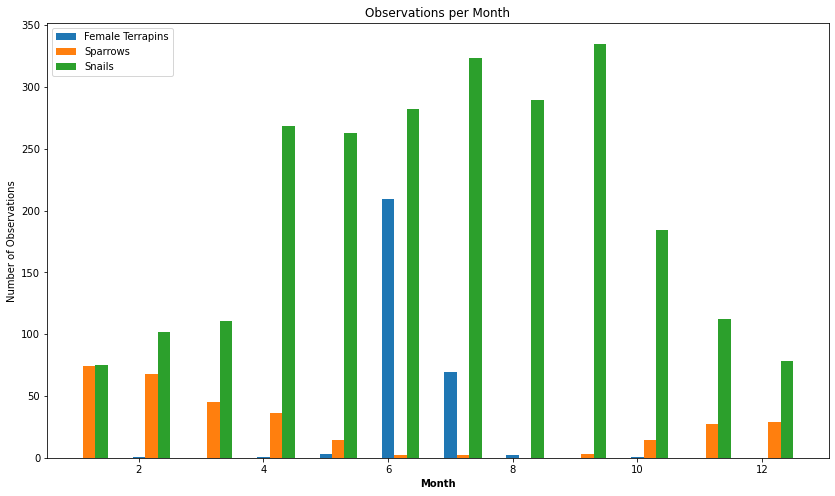

In [53]:
# Read data in
female_terrapin_query = """
SELECT observed_on_details_month, COUNT(*) as num_observations
FROM female_info  -- Assuming adult terrapins are the primary concern
GROUP BY observed_on_details_month
ORDER BY observed_on_details_month,num_observations ASC
"""
sparrow_query = """
SELECT observed_on_details_month, COUNT(*) as num_observations
FROM sparrow_info
GROUP BY observed_on_details_month
ORDER BY observed_on_details_month,num_observations ASC
"""
snail_query = """
SELECT observed_on_details_month, COUNT(*) as num_observations
FROM snail_info 
GROUP BY observed_on_details_month
ORDER BY observed_on_details_month,num_observations ASC
"""

female_terrapin_df = pd.read_sql(female_terrapin_query, con)
sparrow_df = pd.read_sql(sparrow_query, con)
snail_df = pd.read_sql(snail_query, con)


# Merge dataframes
combined_df = female_terrapin_df.merge(sparrow_df, on='observed_on_details_month', how='outer') \
                                .merge(snail_df, on='observed_on_details_month', how='outer')
combined_df.columns = ['Month', 'Female Terrapins', 'Sparrows', 'Snails']

# Plot the bar graph
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(combined_df['Month'], combined_df['Female Terrapins'], label='Female Terrapins', width=0.2)
ax.bar(combined_df['Month'] + 0.2, combined_df['Sparrows'], label='Sparrows', width=0.2)
ax.bar(combined_df['Month'] + 0.4, combined_df['Snails'], label='Snails', width=0.2)
ax.set_xlabel("Month", fontweight='bold')
ax.set_ylabel("Number of Observations")
ax.set_title("Observations per Month")
ax.legend()

# Show plot
plt.show()


#### Graph on Who Would be Impacted the Most ####

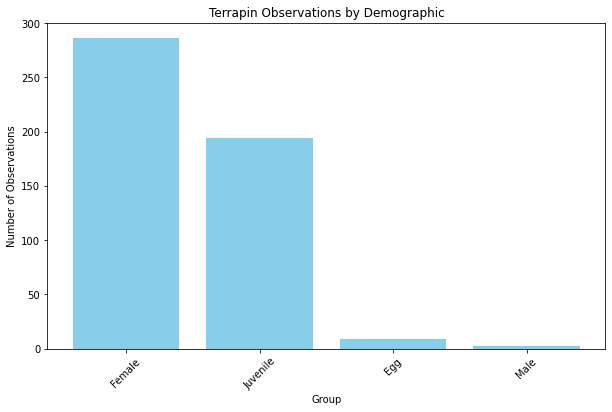

In [41]:
# Read data in
demographics_query = """
SELECT 'Egg' as 'group', COUNT(*) as count FROM egg_info
UNION
SELECT 'Juvenile', COUNT(*) FROM juvenile_info
UNION
SELECT 'Female', COUNT(*) FROM female_info
UNION
SELECT 'Male', COUNT(*) FROM male_info
ORDER BY count DESC
"""

demographics_df = pd.read_sql(demographics_query, con)

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(demographics_df['group'], demographics_df['count'], color='skyblue')
plt.xlabel('Group')
plt.ylabel('Number of Observations')
plt.title('Terrapin Observations by Demographic')
plt.xticks(rotation=45)

# Show plot
plt.show()

#### Graph on Female Terrapin Location ####

/var/folders/wm/z1f6_f9d3zb9gt8g3wkr4cl00000gn/T/ipykernel_38245/47880093.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


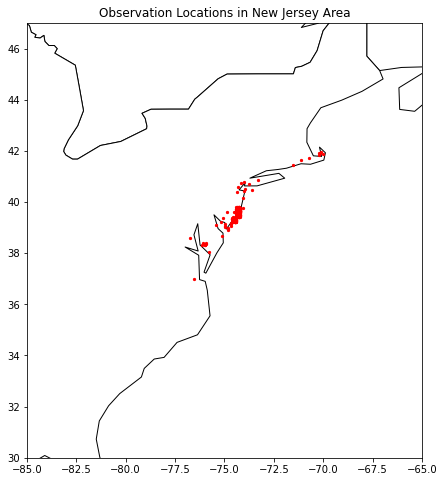

In [21]:
# Read data in
location_query = """
SELECT location FROM female_info WHERE location IS NOT NULL;
"""
location_df = pd.read_sql(location_query, con)
location_df['latitude'] = location_df['location'].apply(lambda x: float(x.split(',')[0]))
location_df['longitude'] = location_df['location'].apply(lambda x: float(x.split(',')[1]))
gdf = gpd.GeoDataFrame(
    location_df, 
    geometry=gpd.points_from_xy(location_df.longitude, location_df.latitude)
)

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=4326)
gdf.set_crs(epsg=4326, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='white', edgecolor='black')

# Make it zoom into the east coast
bounds = {
    "min_lon": -85.0,
    "min_lat": 30.0,
    "max_lon": -65.0,
    "max_lat": 47.0
}
ax.set_xlim([bounds["min_lon"], bounds["max_lon"]])
ax.set_ylim([bounds["min_lat"], bounds["max_lat"]])

# Plot data points
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('Observation Locations in New Jersey Area')
plt.show()

#### Overall Descision

I would not approve the construction of this project to build a bike path since it will heavily affect the species near it. First off, females are seen the most around this area so they will be affected the most. The more in danger they are, the faster they will be driven to extinction. Even if we pick a good time to avoid affecting the terrapin, it would affect the nearby species such as the saltmarsh sparrow and eastern mud snail.